<h2>Recommendation System</h2>
<p>https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system?resource=download</p>

In [256]:
import pandas as pd

ratingsDetails = pd.read_csv('recSysData/ratings.csv')


In [257]:
print(ratingsDetails.head())

   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510


In [258]:
print(ratingsDetails.tail())

          userId  movieId  rating   timestamp
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515


In [259]:
ratings_Details = ratingsDetails.sample(n = 500000)

In [260]:
ratings_Details.head()

,userId,movieId,rating,timestamp
14589411,94417,1991,3.0,939232314
9675043,62808,293,5.0,848385977
1830538,12171,597,3.0,833268836
15671363,101489,71264,4.0,1560261686
4343696,28592,1912,4.0,971107771


In [261]:
moviesDetails = pd.read_csv('recSysData/movies.csv')

In [262]:
moviesDetails.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [263]:
ratingsDetails.shape

(25000095, 4)

In [264]:
moviesDetails.shape

(62423, 3)

In [265]:
dataset = pd.merge(ratingsDetails, moviesDetails, on = "movieId")

In [266]:
# The basic statistical data
dataset.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [267]:
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama
25000094,162386,200728,4.0,1554651472,Il pesce innamorato (1999),(no genres listed)


In [268]:
import datetime
from datetime import datetime, date
# Change the time stamp to a date and time
dataset['datetime'] = pd.to_datetime(dataset['timestamp'])
# Output the shape to the user
dataset.shape

(25000095, 7)

In [269]:
# Return how many unique data set
dataset.nunique()

userId         162541
movieId         59047
rating             10
timestamp    20115267
title           58958
genres           1621
datetime     20115267
dtype: int64

<h3 align = center>Data Manipulation</h3>

In [270]:
# Average Rating
myData = dataset

avgRating = myData.groupby('title')['rating'].mean()

avgRating

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.896648
#1 Cheerleader Camp (2010)                                 2.111111
#Captured (2017)                                           3.750000
#Female Pleasure (2018)                                    3.666667
                                                             ...   
…And the Fifth Horseman Is Fear (1965)                     3.250000
キサラギ (2007)                                                3.250000
チェブラーシカ (2010)                                             3.166667
貞子3D (2012)                                                2.375000
줄탁동시 (2012)                                                4.000000
Name: rating, Length: 58958, dtype: float64

In [271]:
# Sort the rating in descending order
sortedRating = avgRating.sort_values(ascending = False)

In [272]:
sortedRating

title
Full of Grace (2015)            5.0
Geordie (1955)                  5.0
Garfield In Paradise (1986)     5.0
Lost Woods (2012)               5.0
Garfield in the Rough (1984)    5.0
                               ... 
Caro Gorbaciov (1988)           0.5
Don't Let Go (2019)             0.5
Ice Queen (2005)                0.5
The Lodge (2019)                0.5
Robot Wars (1993)               0.5
Name: rating, Length: 58958, dtype: float64

<b>Total number of ratings for a particular movie</b>

In [273]:
numRatings = myData.groupby('title')['rating'].count()

In [274]:
numRatings.head()

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)      1
"Great Performances" Cats (1998)                           179
#1 Cheerleader Camp (2010)                                   9
#Captured (2017)                                             2
#Female Pleasure (2018)                                      3
Name: rating, dtype: int64

In [275]:
# Instantiate a new dataframe instance
newRecord = pd.DataFrame()
# Create columns in dataframe
newRecord['Average Ratings'] = avgRating
newRecord['Count Of Total Ratings'] = numRatings

In [276]:
# The two columns are inner joined on the title
newRecord.head()

,Average Ratings,Count Of Total Ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


In [277]:
# Data Visulization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

<AxesSubplot:>

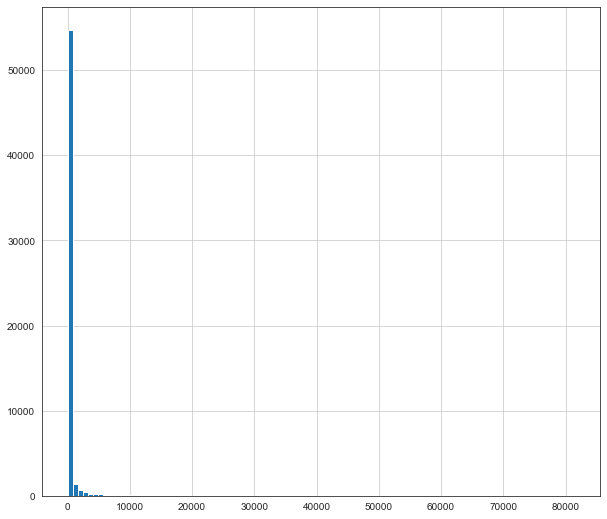

In [278]:
# Where did the title go? It is the index used to mearge the data frame
newRecord.columns
# Determine figure size
plt.figure(figsize = (10, 9))
# Create histogram with bins
newRecord['Count Of Total Ratings'].hist(bins = 100)

<p>The majority of the movies have received less than 50 ratings. The number of movies having more than
100 ratings is significantly low.</p>

<AxesSubplot:>

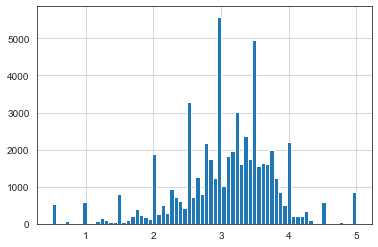

In [279]:
newRecord['Average Ratings'].hist(bins = 70)

<p>The integer values are more prominant than the float values. People have a natural tendancy
to input whole number number instead of decimals. The data appears to be skewed to the right
with a weak normal distribution. A movie with a higher number of ratings generally will have a higher
average rating. Removing outliers make your models work better.</p>

<Figure size 576x432 with 0 Axes>

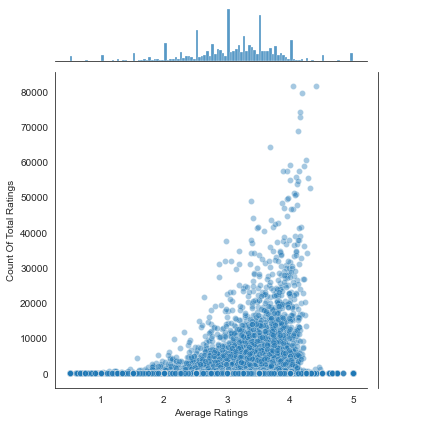

In [280]:
plt.figure(figsize = (8, 6))
sns.jointplot(x = 'Average Ratings', y = 'Count Of Total Ratings', data = newRecord, alpha = 0.4)


<p>From the above, we can see that movies with a higher average rating have a higher number
of ratings</p>

In [281]:
# Sorting values by a ['Number of Rating column']
# Had a list index out of range problem. Decided to sample users from the data
# Created a new table of containing userIds for a specific size
# Create new data frame
newFrame2 = pd.DataFrame()
newFrame2['userId'] = myData['userId'].sample(n = 200000)
# Assign the new columns of the data frame to the specified targets
newFrame2['title'] = myData['title']
newFrame2['rating'] = myData['rating']
# Output to use
newFrame2.head()

,userId,title,rating
12041016,121262,"Wedding Singer, The (1998)",3.5
265584,157711,"Good Morning, Vietnam (1987)",3.5
15892202,89723,Garden State (2004),3.5
14785641,156918,Easy Rider (1969),4.5
16242670,1776,One Flew Over the Cuckoo's Nest (1975),5.0


In [282]:
newFrame2.shape

(200000, 3)

In [283]:
movieMatrix = newFrame2.pivot_table(index = 'userId', columns = 'title', values = 'rating')


In [284]:
movieMatrix.head()

title,"""Great Performances"" Cats (1998)",'71 (2014),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Dis)Honesty: The Truth About Lies (2015),*batteries not included (1987),...,xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),"Ó Paí, Ó (2007)",Газгольдер: Фильм (2014),Мартынко (1987),Пес Барбос и необычный кросс (1961),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
movieMatrix.columns

Index(['"Great Performances" Cats (1998)', ''71 (2014)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       ''night Mother (1986)', '(500) Days of Summer (2009)',
       '(Dis)Honesty: The Truth About Lies (2015)',
       '*batteries not included (1987)',
       ...
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nos amours (1983)', 'À nous la liberté (Freedom for Us) (1931)',
       'À propos de Nice (1930)', 'Ó Paí, Ó (2007)',
       'Газгольдер: Фильм (2014)', 'Мартынко (1987)',
       'Пес Барбос и необычный кросс (1961)', '貞子3D (2012)'],
      dtype='object', name='title', length=13186)

In [286]:
investigateXXX = movieMatrix['xXx (2002)']
investigateXXX.head()

userId
1   NaN
3   NaN
4   NaN
5   NaN
8   NaN
Name: xXx (2002), dtype: float64

<p>We can find similar movies by comparing the column output of the above to the dataset</p>

In [ ]:
moviesSimilar = movieMatrix.corrwith(investigateXXX)
moviesSimilar

<p>We can see that it is working perfectly because the corralation between the dataset 
and our data point will always be one. </p>

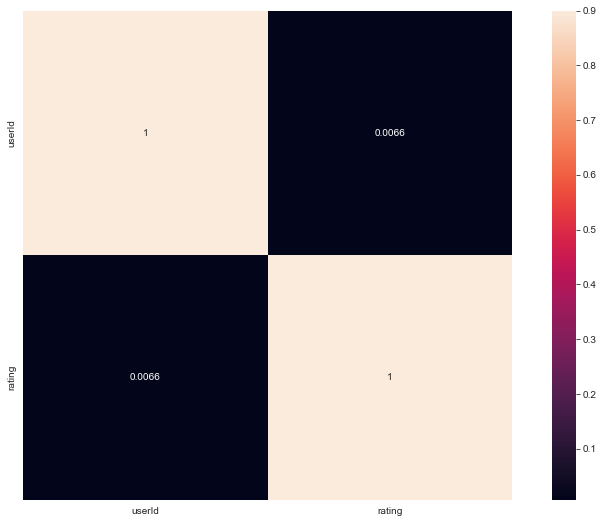

In [288]:
correlationMetrics = newFrame2.corr()

fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlationMetrics, annot = True, vmax = .9, square = True)
plt.show()

In [289]:
xxxReturnCorr = pd.DataFrame(moviesSimilar, columns = ['Correlation'])
xxxReturnCorr.dropna(inplace = True)
xxxReturnCorr.head()

,Correlation
title,
300 (2007),-1.0
Alexander (2004),-1.0
Coyote Ugly (2000),1.0
Death Race (2008),1.0
"French Connection, The (1971)",1.0


In [290]:
xxxReturnCorr.tail()

,Correlation
title,
Sex and the City 2 (2010),-1.0
Spider-Man (2002),1.0
Spider-Man 2 (2004),-1.0
True Lies (1994),1.0
xXx (2002),1.0


<p>From the above, we can see that there are positive and negetive correlations. If we were doing a 
movie recommendation, then we would iterate over the list of correlations and return the list in 
descending order.</p>